In [1]:
import pandas as pd
from pathlib import Path   # ← este import faltaba

path = r"C:\Users\Jose Ruiz\Documents\Scool\Master serio\Guacamaia\Guacamaia_data\Booking\reviews_booking_venezuela_clean.csv"

# archivo de log .txt
log_file_path = Path(r"C:\Users\Jose Ruiz\Documents\Scool\Master serio\Guacamaia\Guacamaia_data\Booking\proceso.txt")

def log_step(msg):
    log_line = f"[STEP] {msg}"
    # mostrar en consola
    print(log_line)
    # guardar en archivo .txt (append)
    with open(log_file_path, "a", encoding="utf-8") as f:
        f.write(log_line + "\n")

# cargar dataset
df = pd.read_csv(path, on_bad_lines="skip")

print("filas, columnas:", df.shape)
print("\ncolumnas:")
print(list(df.columns))

filas, columnas: (18326, 21)

columnas:
['username', 'user_country', 'room_view', 'stay_duration', 'stay_type', 'review_post_date', 'review_title', 'rating', 'original_lang', 'review_text_liked', 'review_text_disliked', 'full_review', 'found_helpful', 'found_unhelpful', 'owner_resp_text', 'hotel', 'ciudad', 'review_date', 'rating_5', 'language', 'review_text']


In [2]:
# paso 2: limpieza mínima en nuestro dataset de booking

# parsear fechas
df["review_post_date"] = pd.to_datetime(df["review_post_date"], errors="coerce")
df["review_date"]      = pd.to_datetime(df["review_date"], errors="coerce")

# ratings a numérico
df["rating"]   = pd.to_numeric(df["rating"], errors="coerce")
df["rating_5"] = pd.to_numeric(df["rating_5"], errors="coerce")

# deduplicación por combinación de columnas claves
subset_cols = ["username","full_review","review_post_date","hotel"]
antes = len(df)
df = df.drop_duplicates(subset=subset_cols, keep="first")
print("filas eliminadas por duplicado:", antes - len(df))

# helpers
df["review_len"] = df["full_review"].astype(str).str.len()
df["year"]  = df["review_post_date"].dt.year
df["month"] = df["review_post_date"].dt.month

df[["username","hotel","ciudad","rating","review_post_date","review_len"]].head(3)

filas eliminadas por duplicado: 0


,username,hotel,ciudad,rating,review_post_date,review_len
0,Anonymous,Hermoso Apartamento Zona Este,Barquisimeto,9.0,2025-08-20,82
1,Anonymous,Hermoso Apartamento Zona Este,Barquisimeto,6.0,2025-08-16,338
2,Adolfredo,Hermoso Apartamento Zona Este,Barquisimeto,9.0,2025-08-08,14


[STEP] Generar gráfico de barras y tabla del Top 10 de ciudades con más reseñas en Booking (Venezuela)


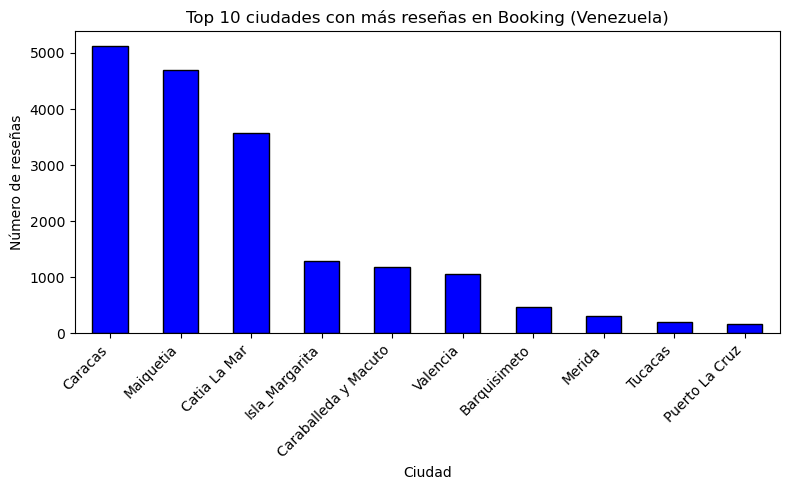

ciudad
Caracas                 5129
Maiquetia               4689
Catia La Mar            3567
Isla_Margarita          1294
Caraballeda y Macuto    1183
Valencia                1051
Barquisimeto             464
Merida                   305
Tucacas                  202
Puerto La Cruz           170
Name: count, dtype: int64

In [38]:
import matplotlib.pyplot as plt
log_step("Generar gráfico de barras y tabla del Top 10 de ciudades con más reseñas en Booking (Venezuela)")

# conteo por ciudad
ciudad_counts = df["ciudad"].value_counts().head(10)

# gráfico
plt.figure(figsize=(8,5))
ciudad_counts.plot(kind="bar", color="Blue", edgecolor="black")
plt.title("Top 10 ciudades con más reseñas en Booking (Venezuela)")
plt.ylabel("Número de reseñas")
plt.xlabel("Ciudad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# mostrar tabla también
ciudad_counts


[STEP] Visualizar distribución de ratings con histograma y mostrar estadísticas descriptivas básicas


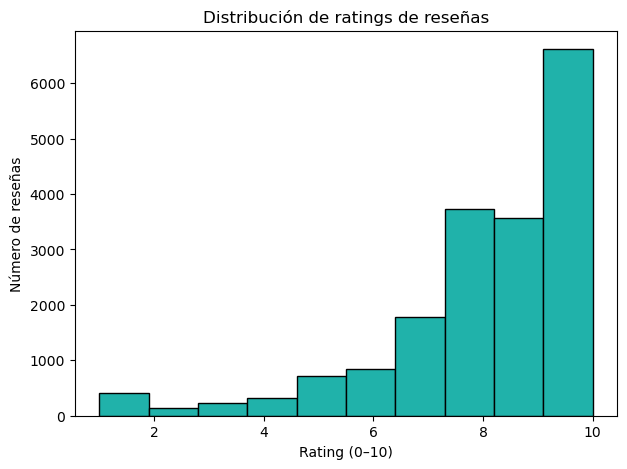

count    18326.000000
mean         8.281895
std          2.030084
min          1.000000
25%          8.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

In [4]:
# histograma de las valoraciones
log_step("Visualizar distribución de ratings con histograma y mostrar estadísticas descriptivas básicas")
plt.figure(figsize=(7,5))
plt.hist(df["rating"].dropna(), bins=10, color="lightseagreen", edgecolor="black")
plt.title("Distribución de ratings de reseñas")
plt.xlabel("Rating (0–10)")
plt.ylabel("Número de reseñas")
plt.show()

# estadísticos rápidos
df["rating"].describe()

[STEP] Generar gráfico de barras y tabla del Top 15 países de origen de usuarios en Booking


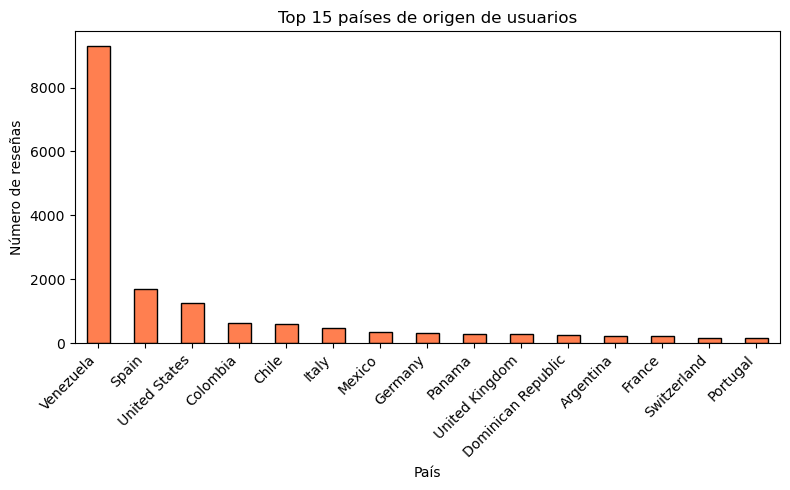

user_country
Venezuela             9294
Spain                 1696
United States         1241
Colombia               621
Chile                  599
Italy                  467
Mexico                 361
Germany                313
Panama                 302
United Kingdom         278
Dominican Republic     249
Argentina              229
France                 219
Switzerland            174
Portugal               148
Name: count, dtype: int64

In [5]:
# top 10 países de los usuarios
log_step("Generar gráfico de barras y tabla del Top 15 países de origen de usuarios en Booking")

paises = df["user_country"].value_counts().head(15)

plt.figure(figsize=(8,5))
paises.plot(kind="bar", color="coral", edgecolor="black")
plt.title("Top 15 países de origen de usuarios")
plt.ylabel("Número de reseñas")
plt.xlabel("País")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

paises

[STEP] Generar gráfico de barras y tabla del Top 10 idiomas originales de las reseñas en Booking


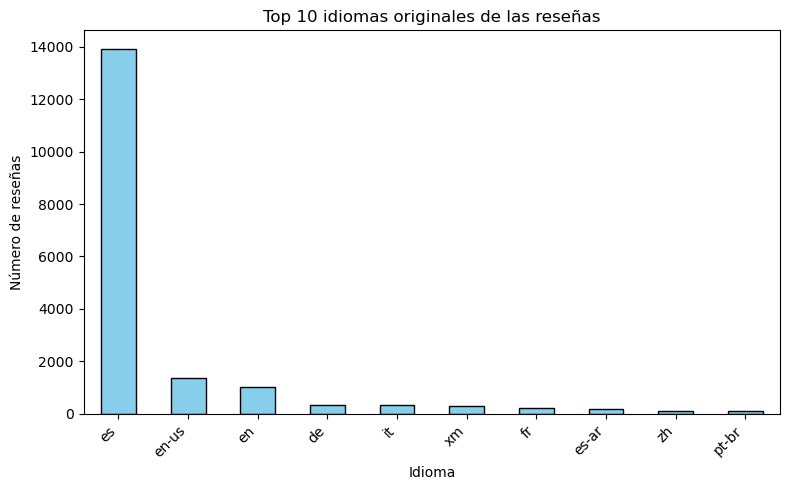

original_lang
es       13922
en-us     1359
en        1035
de         340
it         331
xm         291
fr         214
es-ar      174
zh         120
pt-br      113
Name: count, dtype: int64

In [6]:
# top 10 idiomas originales
idiomas = df["original_lang"].value_counts().head(10)
log_step("Generar gráfico de barras y tabla del Top 10 idiomas originales de las reseñas en Booking")


plt.figure(figsize=(8,5))
idiomas.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 idiomas originales de las reseñas")
plt.ylabel("Número de reseñas")
plt.xlabel("Idioma")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

idiomas

[STEP] Calcular y visualizar el rating promedio por idioma original (Top 10)


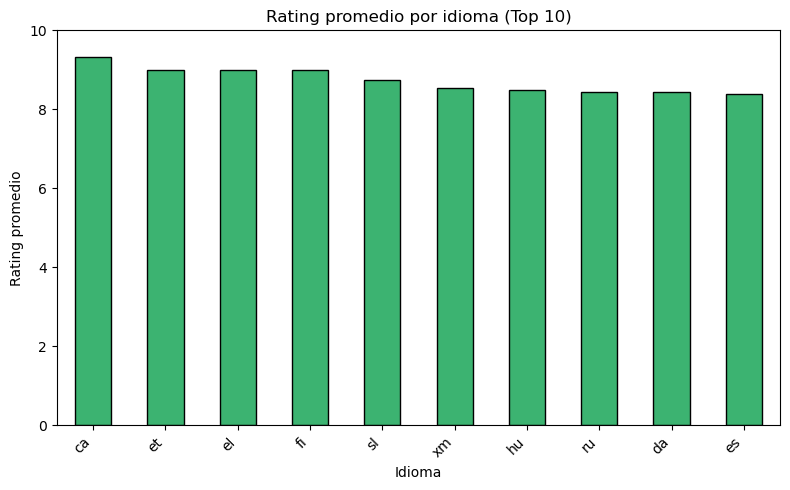

original_lang
ca    9.318182
et    9.000000
el    9.000000
fi    9.000000
sl    8.750000
xm    8.549828
hu    8.500000
ru    8.435294
da    8.428571
es    8.385002
Name: rating, dtype: float64

In [7]:
# calcular promedio de rating por idioma original
log_step("Calcular y visualizar el rating promedio por idioma original (Top 10)")

idioma_rating = (
    df.groupby("original_lang")["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
idioma_rating.plot(kind="bar", color="mediumseagreen", edgecolor="black")
plt.title("Rating promedio por idioma (Top 10)")
plt.ylabel("Rating promedio")
plt.xlabel("Idioma")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

idioma_rating

[STEP] Calcular y visualizar el rating promedio por país de origen (Top 30)


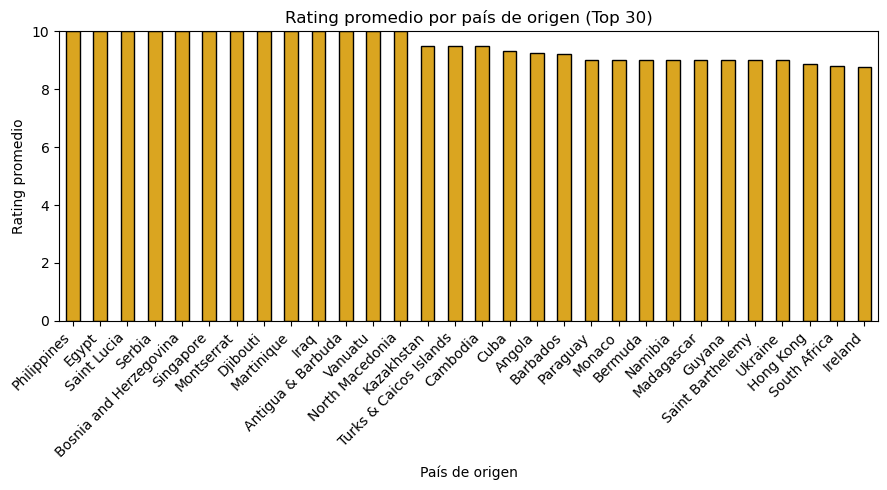

user_country
Philippines               10.000000
Egypt                     10.000000
Saint Lucia               10.000000
Serbia                    10.000000
Bosnia and Herzegovina    10.000000
Singapore                 10.000000
Montserrat                10.000000
Djibouti                  10.000000
Martinique                10.000000
Iraq                      10.000000
Antigua & Barbuda         10.000000
Vanuatu                   10.000000
North Macedonia           10.000000
Kazakhstan                 9.500000
Turks & Caicos Islands     9.500000
Cambodia                   9.500000
Cuba                       9.333333
Angola                     9.250000
Barbados                   9.200000
Paraguay                   9.000000
Monaco                     9.000000
Bermuda                    9.000000
Namibia                    9.000000
Madagascar                 9.000000
Guyana                     9.000000
Saint Barthelemy           9.000000
Ukraine                    9.000000
Hong Kong      

In [8]:
# promedio de rating por país de origen
log_step("Calcular y visualizar el rating promedio por país de origen (Top 30)")

pais_rating = (
    df.groupby("user_country")["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(30)
)

plt.figure(figsize=(9,5))
pais_rating.plot(kind="bar", color="goldenrod", edgecolor="black")
plt.title("Rating promedio por país de origen (Top 30)")
plt.ylabel("Rating promedio")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

pais_rating

[STEP] Analizar evolución temporal: agrupar reseñas por mes y graficar su tendencia


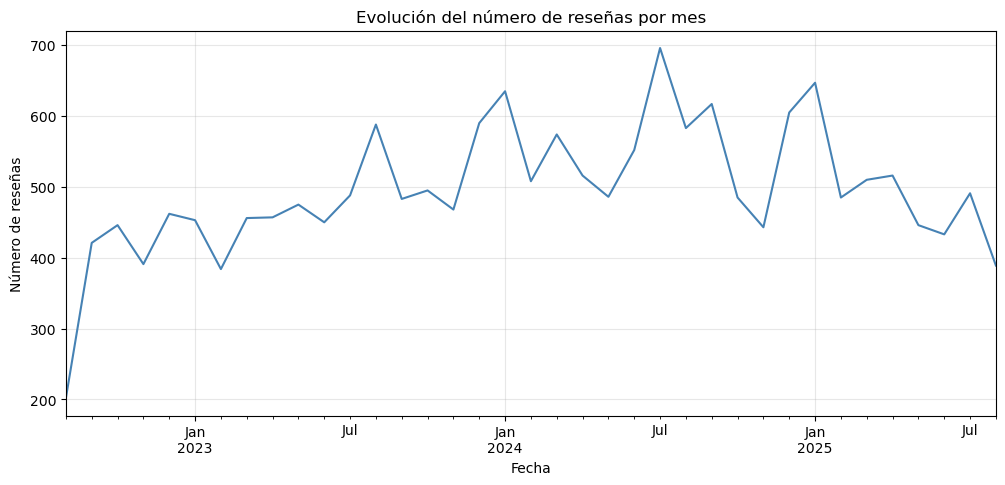

review_post_date
2024-09-01    617
2024-10-01    485
2024-11-01    443
2024-12-01    605
2025-01-01    647
2025-02-01    485
2025-03-01    510
2025-04-01    516
2025-05-01    446
2025-06-01    433
2025-07-01    491
2025-08-01    389
Freq: MS, dtype: int64

In [9]:
# agrupar por año-mes y contar reseñas
log_step("Analizar evolución temporal: agrupar reseñas por mes y graficar su tendencia")

resenas_mensuales = df.groupby(df["review_post_date"].dt.to_period("M")).size()

# convertir a índice datetime para graficar
resenas_mensuales.index = resenas_mensuales.index.to_timestamp()

plt.figure(figsize=(12,5))
resenas_mensuales.plot(color="steelblue")
plt.title("Evolución del número de reseñas por mes")
plt.ylabel("Número de reseñas")
plt.xlabel("Fecha")
plt.grid(alpha=0.3)
plt.show()

resenas_mensuales.tail(12)  # últimos 12 meses

In [37]:
print("filas, columnas:", df.shape)

filas, columnas: (18326, 26)


[STEP] Calcular y visualizar la evolución temporal del rating promedio mensual


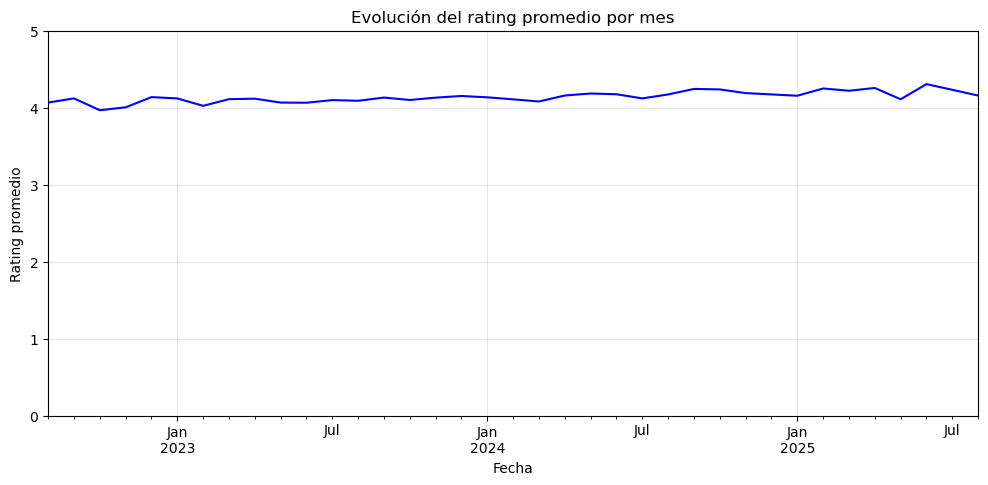

review_post_date
2024-09-01    4.241491
2024-10-01    4.235052
2024-11-01    4.187359
2024-12-01    4.170248
2025-01-01    4.153014
2025-02-01    4.247423
2025-03-01    4.217647
2025-04-01    4.253876
2025-05-01    4.107623
2025-06-01    4.303695
2025-07-01    4.230143
2025-08-01    4.155527
Freq: MS, Name: rating, dtype: float64

In [36]:
# rating promedio mensual
log_step("Calcular y visualizar la evolución temporal del rating promedio mensual")
rating_mensual = df.groupby(df["review_post_date"].dt.to_period("M"))["rating"].mean()

rating_mensual.index = rating_mensual.index.to_timestamp()
rating_mensual= rating_mensual/2
plt.figure(figsize=(12,5))
rating_mensual.plot(color="blue")
plt.title("Evolución del rating promedio por mes")
plt.ylabel("Rating promedio")
plt.xlabel("Fecha")
plt.ylim(0,5)
plt.grid(alpha=0.3)
plt.show()

rating_mensual.tail(12)  # últimos 12 meses

[STEP] Generar heatmap de reseñas por año y mes para visualizar estacionalidad


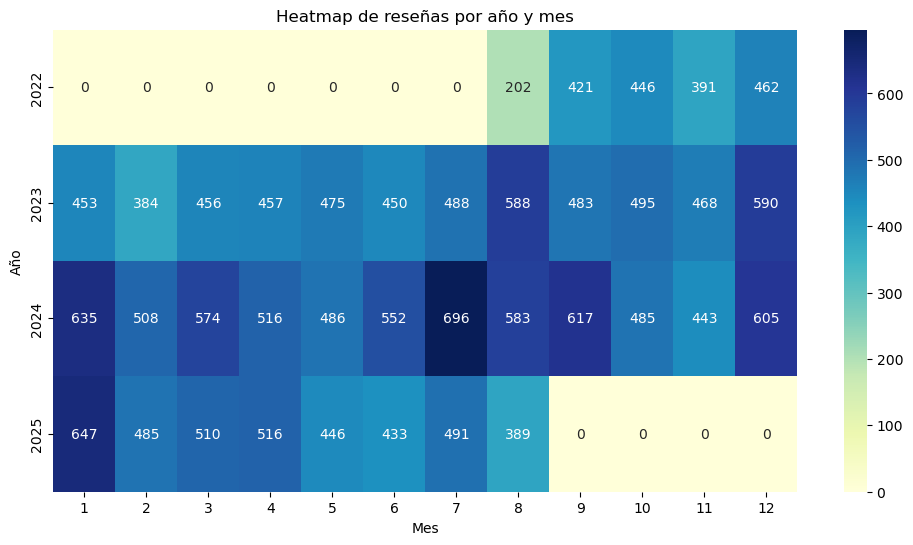

review_post_date,1,2,3,4,5,6,7,8,9,10,11,12
review_post_date,,,,,,,,,,,,
2022,0,0,0,0,0,0,0,202,421,446,391,462
2023,453,384,456,457,475,450,488,588,483,495,468,590
2024,635,508,574,516,486,552,696,583,617,485,443,605
2025,647,485,510,516,446,433,491,389,0,0,0,0


In [11]:
import seaborn as sns
log_step("Generar heatmap de reseñas por año y mes para visualizar estacionalidad")

# crear tabla pivote: filas = año, columnas = mes, valores = número de reseñas
heatmap_data = df.groupby([df["review_post_date"].dt.year, df["review_post_date"].dt.month]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title("Heatmap de reseñas por año y mes")
plt.ylabel("Año")
plt.xlabel("Mes")
plt.show()

heatmap_data.tail(5)  # mostrar últimos 5 años en tabla

[STEP] Generar heatmap del rating promedio por año y mes


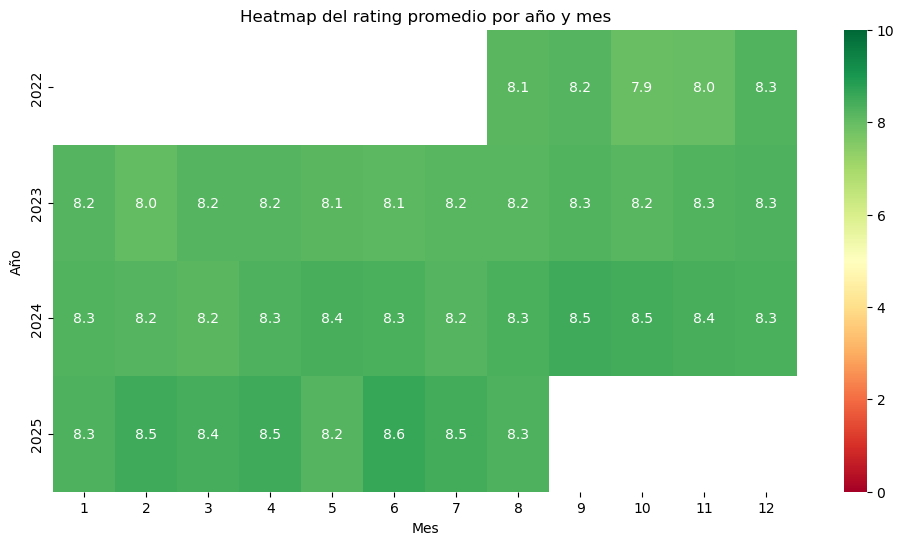

review_post_date,1,2,3,4,5,6,7,8,9,10,11,12
review_post_date,,,,,,,,,,,,
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.128713,8.237530,7.930493,8.005115,8.270563
2023,8.236203,8.044271,8.217105,8.229759,8.128421,8.124444,8.192623,8.175170,8.258799,8.195960,8.256410,8.300000
2024,8.264567,8.212598,8.156794,8.312016,8.364198,8.344203,8.237069,8.339623,8.482982,8.470103,8.374718,8.340496
2025,8.306028,8.494845,8.435294,8.507752,8.215247,8.607390,8.460285,8.311054,NaN,NaN,NaN,NaN


In [12]:
# tabla pivote: filas = año, columnas = mes, valores = promedio de rating
log_step("Generar heatmap del rating promedio por año y mes")

heatmap_rating = df.groupby([df["review_post_date"].dt.year, df["review_post_date"].dt.month])["rating"].mean().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_rating, cmap="RdYlGn", annot=True, fmt=".1f", cbar=True, vmin=0, vmax=10)
plt.title("Heatmap del rating promedio por año y mes")
plt.ylabel("Año")
plt.xlabel("Mes")
plt.show()

heatmap_rating.tail(5)

[STEP] Visualizar distribución de la longitud de las reseñas y mostrar estadísticas descriptivas


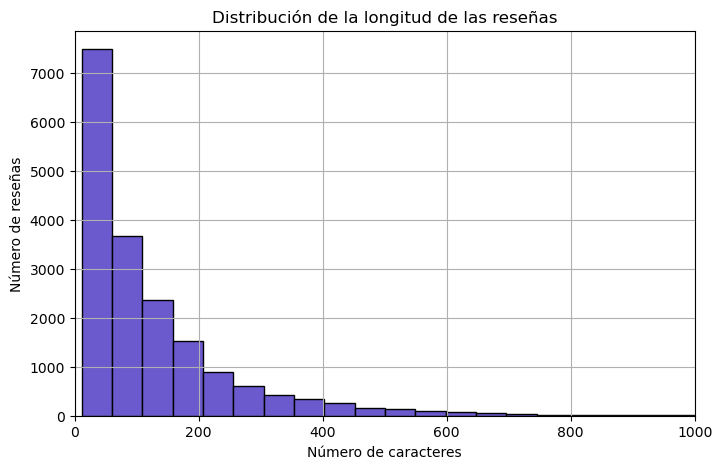

count    18326.000000
mean       127.824457
std        163.105344
min         11.000000
25%         19.000000
50%         80.000000
75%        163.000000
max       2458.000000
Name: review_len, dtype: float64

In [13]:
log_step("Visualizar distribución de la longitud de las reseñas y mostrar estadísticas descriptivas")

plt.figure(figsize=(8,5))
df["review_len"].hist(bins=50, color="slateblue", edgecolor="black")
plt.title("Distribución de la longitud de las reseñas")
plt.xlabel("Número de caracteres")
plt.ylabel("Número de reseñas")
plt.xlim(0, 1000)  # límite para ver mejor, muchas reseñas cortas
plt.show()

df["review_len"].describe()

In [14]:
from collections import Counter
import re
log_step("Analizar reseñas positivas y negativas: limpiar texto, tokenizar y contar palabras más frecuentes")

# función simple para limpiar texto
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r"[^a-záéíóúüñ ]", " ", texto)  # solo letras
    return texto

# reseñas positivas (rating > 8)
positivas = df[df["rating"] > 8]["full_review"].dropna().apply(limpiar_texto)
# reseñas negativas (rating < 5)
negativas = df[df["rating"] < 5]["full_review"].dropna().apply(limpiar_texto)

# tokenizar y contar
positivas_palabras = Counter(" ".join(positivas).split()).most_common(20)
negativas_palabras = Counter(" ".join(negativas).split()).most_common(20)

print("Palabras más comunes en reseñas POSITIVAS:")
print(positivas_palabras)
print("\nPalabras más comunes en reseñas NEGATIVAS:")
print(negativas_palabras)

[STEP] Analizar reseñas positivas y negativas: limpiar texto, tokenizar y contar palabras más frecuentes
Palabras más comunes en reseñas POSITIVAS:
[('title', 10178), ('liked', 7347), ('la', 6101), ('y', 5217), ('el', 4616), ('disliked', 3975), ('de', 3876), ('exceptional', 3681), ('muy', 3572), ('excelente', 3169), ('todo', 2518), ('en', 2308), ('que', 2126), ('superb', 2091), ('del', 1857), ('atención', 1733), ('a', 1587), ('personal', 1586), ('hotel', 1534), ('es', 1458)]

Palabras más comunes en reseñas NEGATIVAS:
[('la', 1251), ('title', 1081), ('el', 1069), ('de', 1051), ('no', 1029), ('y', 921), ('que', 882), ('liked', 821), ('disliked', 657), ('a', 650), ('en', 607), ('the', 558), ('me', 447), ('hotel', 401), ('las', 363), ('es', 331), ('un', 323), ('con', 296), ('para', 293), ('muy', 292)]


[STEP] Generar nubes de palabras para reseñas positivas y negativas


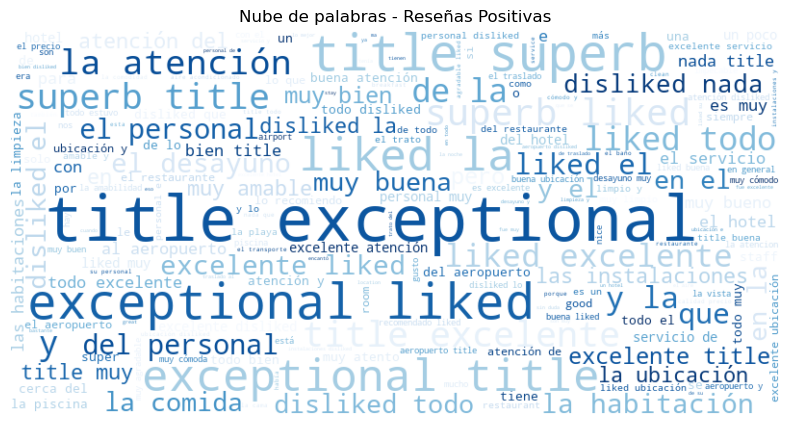

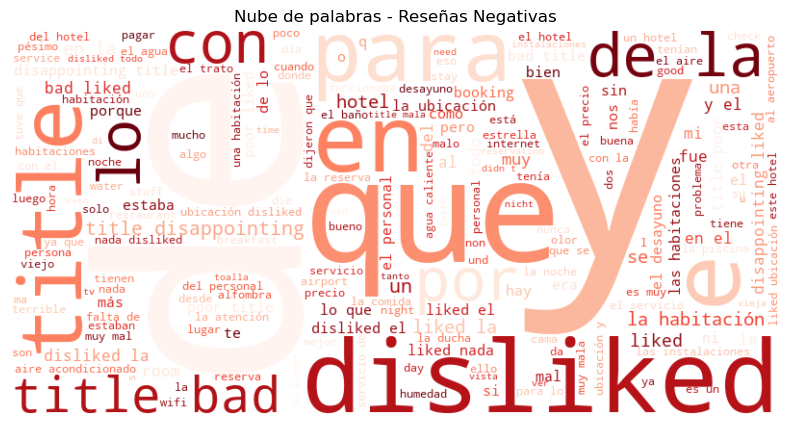

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

log_step("Generar nubes de palabras para reseñas positivas y negativas")


# texto combinado de reseñas positivas y negativas
texto_positivas = " ".join(positivas)
texto_negativas = " ".join(negativas)

# nube de palabras positivas
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(texto_positivas)

plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Reseñas Positivas")
plt.show()

# nube de palabras negativas
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(texto_negativas)

plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Reseñas Negativas")
plt.show()

[STEP] Aplicar análisis de sentimiento con TextBlob y visualizar distribución de reseñas positivas, neutras y negativas


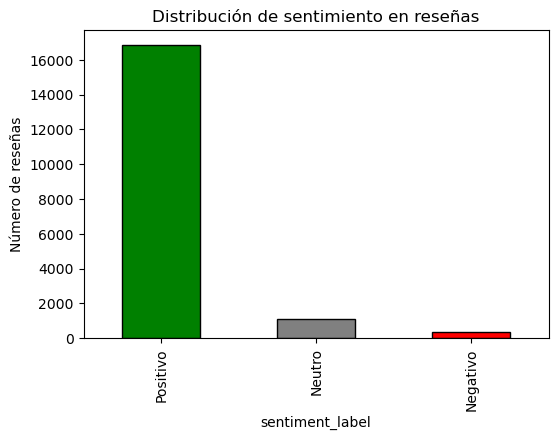

sentiment_label
Positivo    16873
Neutro       1087
Negativo      366
Name: count, dtype: int64

In [16]:
# pip install textblob
from textblob import TextBlob

log_step("Aplicar análisis de sentimiento con TextBlob y visualizar distribución de reseñas positivas, neutras y negativas")

# función para calcular polaridad (-1 = negativo, 0 = neutro, 1 = positivo)
def sentimiento(texto):
    try:
        return TextBlob(str(texto)).sentiment.polarity
    except:
        return 0

# aplicar a una muestra (puedes hacerlo a todo si no es muy pesado)
df["sentiment"] = df["full_review"].apply(sentimiento)

# categorizar en positivo / neutro / negativo
df["sentiment_label"] = pd.cut(
    df["sentiment"],
    bins=[-1, -0.1, 0.1, 1],
    labels=["Negativo", "Neutro", "Positivo"]
)

# distribución
sent_counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(6,4))
sent_counts.plot(kind="bar", color=["Green","gray","red"], edgecolor="black")
plt.title("Distribución de sentimiento en reseñas")
plt.ylabel("Número de reseñas")
plt.show()

sent_counts

[STEP] Calcular y visualizar el sentimiento promedio por idioma original (Top 15)


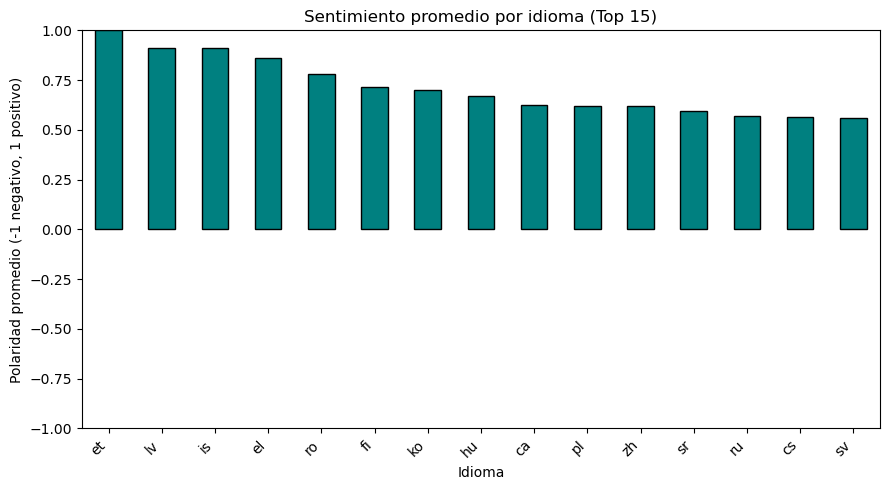

original_lang
et    1.000000
lv    0.910000
is    0.910000
el    0.858889
ro    0.781667
fi    0.713000
ko    0.697778
hu    0.672083
ca    0.626540
pl    0.619600
zh    0.617968
sr    0.595278
ru    0.570228
cs    0.564646
sv    0.557623
Name: sentiment, dtype: float64

In [17]:
log_step("Calcular y visualizar el sentimiento promedio por idioma original (Top 15)")

# promedio de sentimiento por idioma original
sent_por_idioma = (
    df.groupby("original_lang")["sentiment"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(9,5))
sent_por_idioma.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Sentimiento promedio por idioma (Top 15)")
plt.ylabel("Polaridad promedio (-1 negativo, 1 positivo)")
plt.xlabel("Idioma")
plt.xticks(rotation=45, ha="right")
plt.ylim(-1,1)
plt.tight_layout()
plt.show()

sent_por_idioma

[STEP] Calcular y visualizar el sentimiento promedio por país de origen (Top 15)


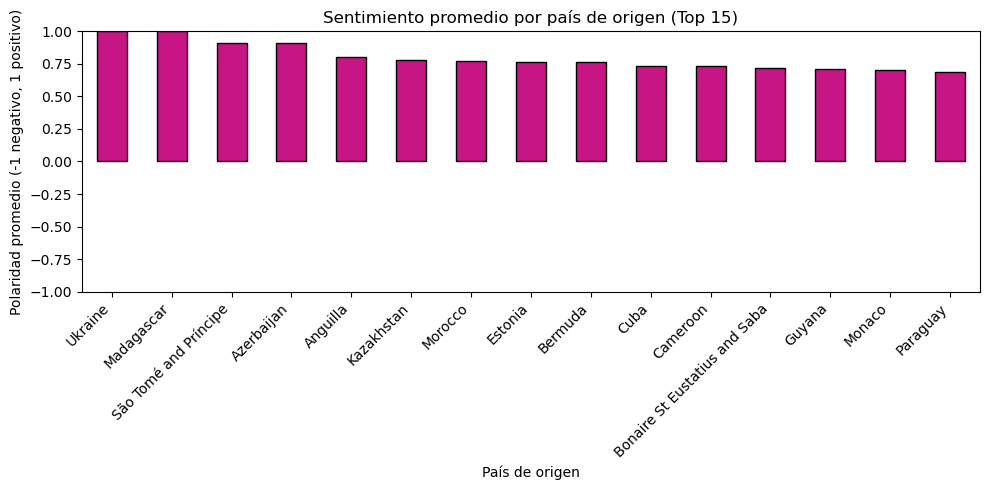

user_country
Ukraine                          1.000000
Madagascar                       1.000000
São Tomé and Príncipe            0.910000
Azerbaijan                       0.910000
Anguilla                         0.805000
Kazakhstan                       0.779167
Morocco                          0.770000
Estonia                          0.763578
Bermuda                          0.760833
Cuba                             0.733333
Cameroon                         0.733333
Bonaire St Eustatius and Saba    0.717032
Guyana                           0.710741
Monaco                           0.703333
Paraguay                         0.688889
Name: sentiment, dtype: float64

In [18]:
log_step("Calcular y visualizar el sentimiento promedio por país de origen (Top 15)")

# promedio de sentimiento por país de origen
sent_por_pais = (
    df.groupby("user_country")["sentiment"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,5))
sent_por_pais.plot(kind="bar", color="mediumvioletred", edgecolor="black")
plt.title("Sentimiento promedio por país de origen (Top 15)")
plt.ylabel("Polaridad promedio (-1 negativo, 1 positivo)")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.ylim(-1,1)
plt.tight_layout()
plt.show()

sent_por_pais

[STEP] Comparar rating promedio y sentimiento promedio por país de origen (Top 15)


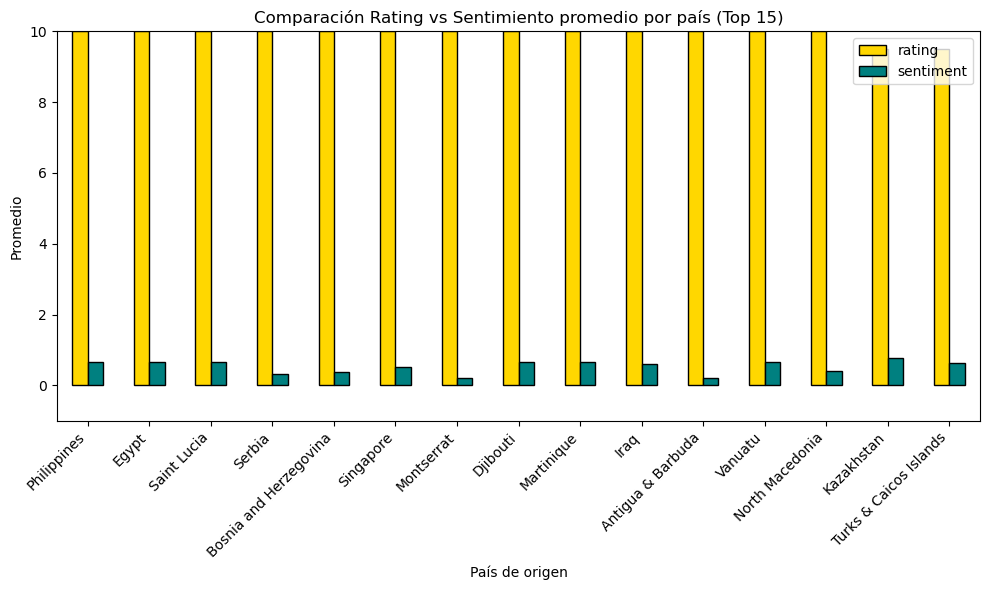

In [19]:
log_step("Comparar rating promedio y sentimiento promedio por país de origen (Top 15)")

# calcular promedio de rating y sentimiento por país
comparacion = (
    df.groupby("user_country")
    .agg({"rating":"mean", "sentiment":"mean"})
    .dropna()
)

# ordenar por rating promedio
comparacion = comparacion.sort_values("rating", ascending=False).head(15)

# gráfico comparativo
comparacion.plot(kind="bar", figsize=(10,6), color=["gold", "teal"], edgecolor="black")
plt.title("Comparación Rating vs Sentimiento promedio por país (Top 15)")
plt.ylabel("Promedio")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.ylim(-1,10)
plt.tight_layout()
plt.show()

[STEP] Comparar rating promedio y sentimiento promedio por idioma original (Top 10)


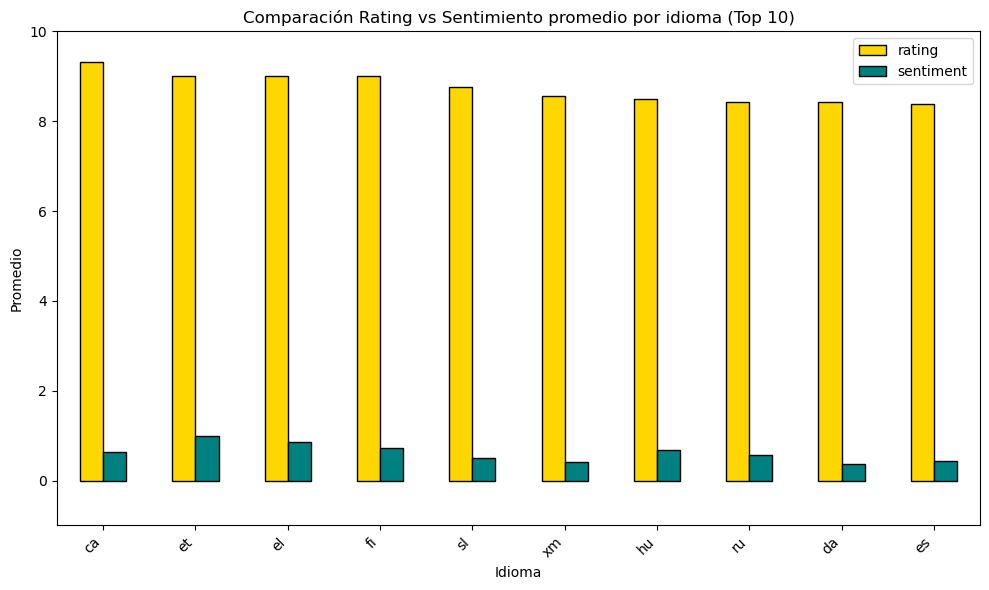

,rating,sentiment
original_lang,,
ca,9.318182,0.626540
et,9.000000,1.000000
el,9.000000,0.858889
fi,9.000000,0.713000
sl,8.750000,0.494167
xm,8.549828,0.408046
hu,8.500000,0.672083
ru,8.435294,0.570228
da,8.428571,0.366667


In [20]:
log_step("Comparar rating promedio y sentimiento promedio por idioma original (Top 10)")

# calcular promedio de rating y sentimiento por idioma
comparacion_idioma = (
    df.groupby("original_lang")
    .agg({"rating":"mean", "sentiment":"mean"})
    .dropna()
)

# ordenar por rating promedio y tomar top 10 idiomas
comparacion_idioma = comparacion_idioma.sort_values("rating", ascending=False).head(10)

# gráfico comparativo
comparacion_idioma.plot(kind="bar", figsize=(10,6), color=["gold", "teal"], edgecolor="black")
plt.title("Comparación Rating vs Sentimiento promedio por idioma (Top 10)")
plt.ylabel("Promedio")
plt.xlabel("Idioma")
plt.xticks(rotation=45, ha="right")
plt.ylim(-1,10)
plt.tight_layout()
plt.show()

comparacion_idioma

[STEP] Filtrar reseñas de Catia La Mar y mostrar Top países de origen de usuarios


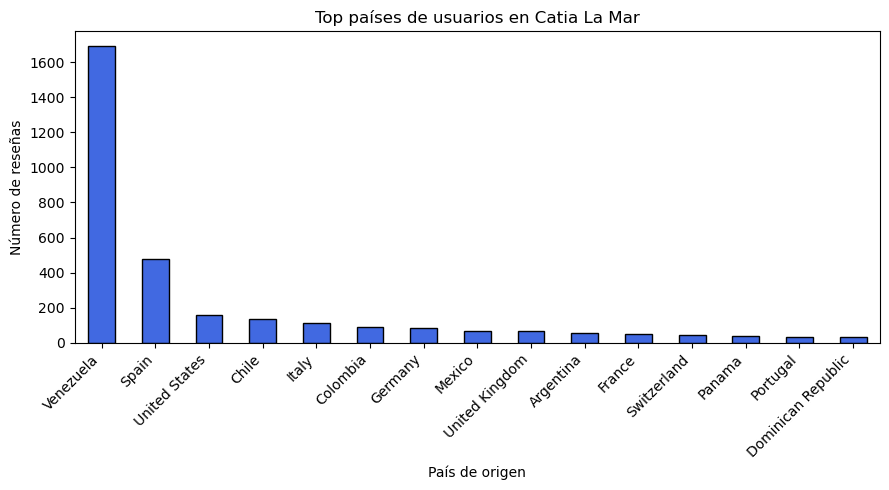

user_country
Venezuela             1692
Spain                  477
United States          155
Chile                  133
Italy                  115
Colombia                87
Germany                 84
Mexico                  68
United Kingdom          65
Argentina               56
France                  48
Switzerland             41
Panama                  37
Portugal                35
Dominican Republic      32
Name: count, dtype: int64

In [21]:
log_step("Filtrar reseñas de Catia La Mar y mostrar Top países de origen de usuarios")

# filtrar por ciudades Catia La Mar
df_catia = df[df["ciudad"].isin(["Catia La Mar"])]

# contar reviews por país
pais_counts = df_catia["user_country"].value_counts().head(15)

# gráfico
plt.figure(figsize=(9,5))
pais_counts.plot(kind="bar", color="royalblue", edgecolor="black")
plt.title("Top países de usuarios en Catia La Mar")
plt.ylabel("Número de reseñas")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

pais_counts

[STEP] Filtrar reseñas de Maiquetía y mostrar Top países de origen de usuarios


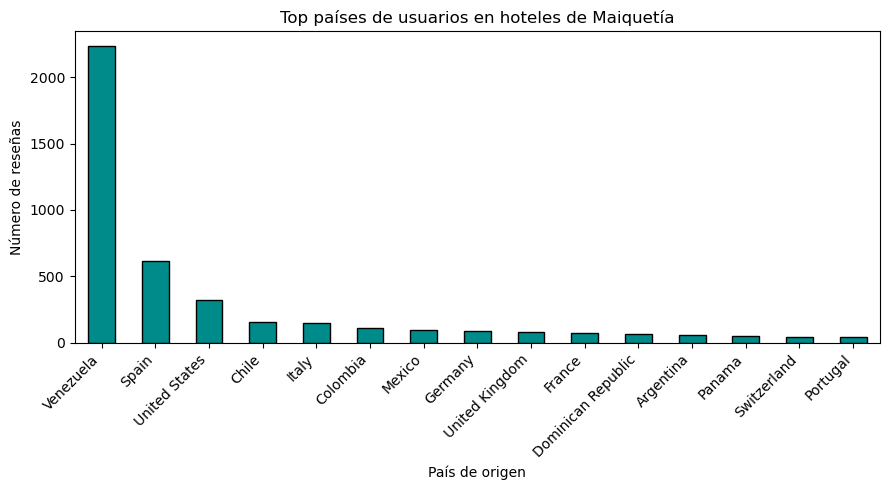

user_country
Venezuela             2234
Spain                  613
United States          320
Chile                  159
Italy                  149
Colombia               113
Mexico                  99
Germany                 87
United Kingdom          82
France                  72
Dominican Republic      66
Argentina               59
Panama                  51
Switzerland             44
Portugal                44
Name: count, dtype: int64

In [22]:
log_step("Filtrar reseñas de Maiquetía y mostrar Top países de origen de usuarios")

# filtrar solo Maiquetía
df_maiquetia = df[df["ciudad"] == "Maiquetia"]

# contar reviews por país
pais_counts_maiquetia = df_maiquetia["user_country"].value_counts().head(15)

# gráfico
plt.figure(figsize=(9,5))
pais_counts_maiquetia.plot(kind="bar", color="darkcyan", edgecolor="black")
plt.title("Top países de usuarios en hoteles de Maiquetía")
plt.ylabel("Número de reseñas")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

pais_counts_maiquetia

[STEP] Filtrar reseñas de Caracas y mostrar Top países de origen de usuarios


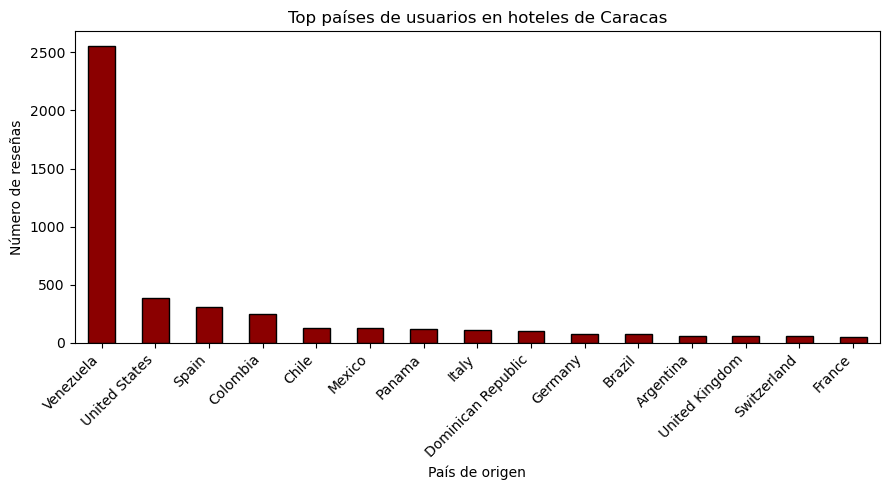

user_country
Venezuela             2554
United States          382
Spain                  309
Colombia               243
Chile                  126
Mexico                 122
Panama                 119
Italy                  110
Dominican Republic     102
Germany                 71
Brazil                  71
Argentina               59
United Kingdom          57
Switzerland             56
France                  52
Name: count, dtype: int64

In [23]:
log_step("Filtrar reseñas de Caracas y mostrar Top países de origen de usuarios")

# filtrar solo Caracas
df_caracas = df[df["ciudad"].str.lower().str.contains("caracas", na=False)]

# contar reviews por país
pais_counts_caracas = df_caracas["user_country"].value_counts().head(15)

# gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
pais_counts_caracas.plot(kind="bar", color="darkred", edgecolor="black")
plt.title("Top países de usuarios en hoteles de Caracas")
plt.ylabel("Número de reseñas")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

pais_counts_caracas

[STEP] Filtrar reseñas de Isla Margarita y mostrar Top países de origen de usuarios


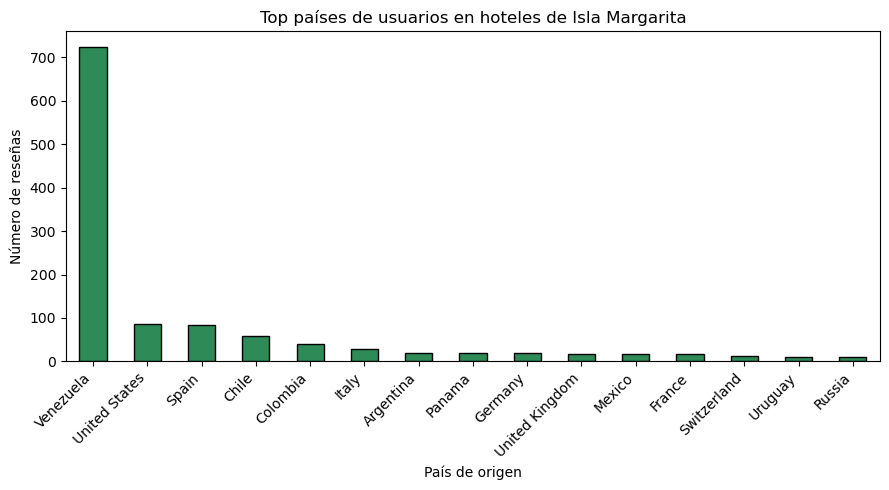

user_country
Venezuela         724
United States      85
Spain              83
Chile              59
Colombia           39
Italy              28
Argentina          20
Panama             20
Germany            19
United Kingdom     17
Mexico             17
France             16
Switzerland        13
Uruguay            10
Russia             10
Name: count, dtype: int64

In [24]:
log_step("Filtrar reseñas de Isla Margarita y mostrar Top países de origen de usuarios")

# filtrar solo Isla_Margarita
df_margarita = df[df["ciudad"] == "Isla_Margarita"]

# contar reviews por país
pais_counts_margarita = df_margarita["user_country"].value_counts().head(15)

# gráfico
plt.figure(figsize=(9,5))
pais_counts_margarita.plot(kind="bar", color="seagreen", edgecolor="black")
plt.title("Top países de usuarios en hoteles de Isla Margarita")
plt.ylabel("Número de reseñas")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

pais_counts_margarita

[STEP] Filtrar reseñas de turistas internacionales (excluyendo Venezuela) y mostrar Top 15 países de origen


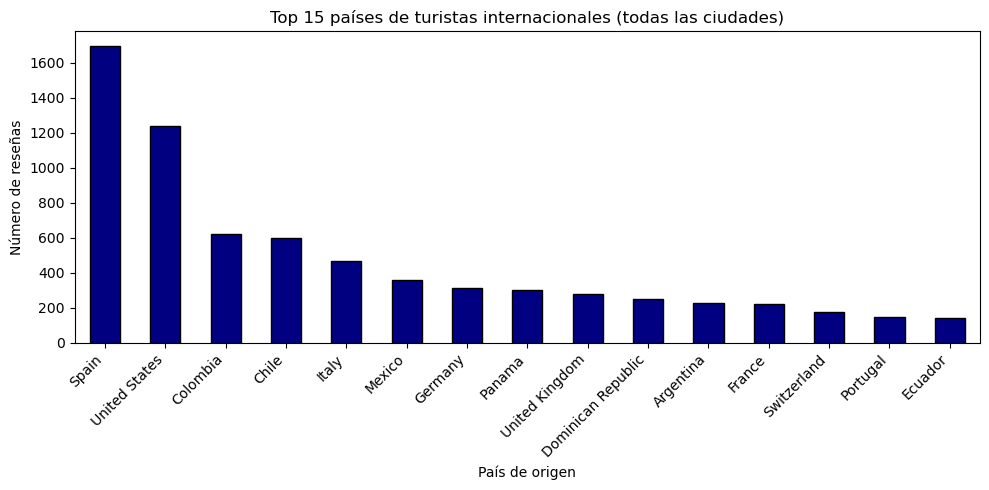

user_country
Spain                 1696
United States         1241
Colombia               621
Chile                  599
Italy                  467
Mexico                 361
Germany                313
Panama                 302
United Kingdom         278
Dominican Republic     249
Argentina              229
France                 219
Switzerland            174
Portugal               148
Ecuador                143
Name: count, dtype: int64

In [25]:
log_step("Filtrar reseñas de turistas internacionales (excluyendo Venezuela) y mostrar Top 15 países de origen")

# filtrar fuera Venezuela
df_internacionales = df[df["user_country"] != "Venezuela"]

# contar países top
pais_counts_internacionales = df_internacionales["user_country"].value_counts().head(15)

# gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
pais_counts_internacionales.plot(kind="bar", color="navy", edgecolor="black")
plt.title("Top 15 países de turistas internacionales (todas las ciudades)")
plt.ylabel("Número de reseñas")
plt.xlabel("País de origen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

pais_counts_internacionales

[STEP] Visualizar relación entre la longitud de las reseñas y el rating con un scatterplot


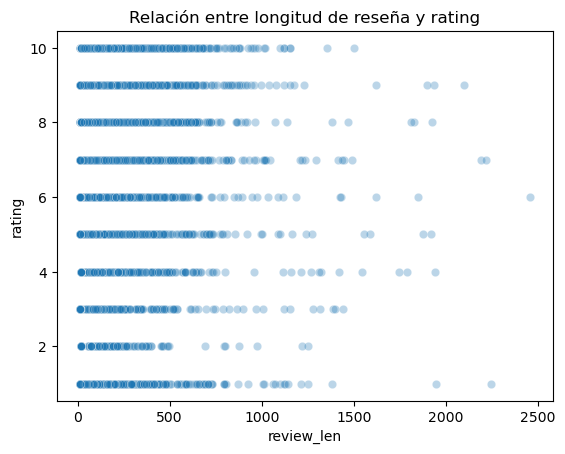

In [26]:
log_step("Visualizar relación entre la longitud de las reseñas y el rating con un scatterplot")

# Relación rating ↔ longitud de reseña
sns.scatterplot(x="review_len", y="rating", data=df, alpha=0.3)
plt.title("Relación entre longitud de reseña y rating")
plt.show()

In [27]:
log_step("Obtener los 10 hoteles más reseñados en el dataset de Booking")
# Hoteles mas reseñados por ciudad
hoteles_top = df["hotel"].value_counts().head(10)
hoteles_top

[STEP] Obtener los 10 hoteles más reseñados en el dataset de Booking


hotel
Eurobuilding Express Maiquetia    2221
Catimar                           1675
Alto Mar                           996
Villa Playa Grande                 959
Chacao Suites Caracas              926
Eurobuilding Suites Caracas        844
Vip La Guaira                      779
Buenavista Inn                     770
Continental Altamira Caracas       526
Posada Restaurant La Guaricha      515
Name: count, dtype: int64

[STEP] Calcular y visualizar el porcentaje de turistas internacionales por ciudad (Top 10)


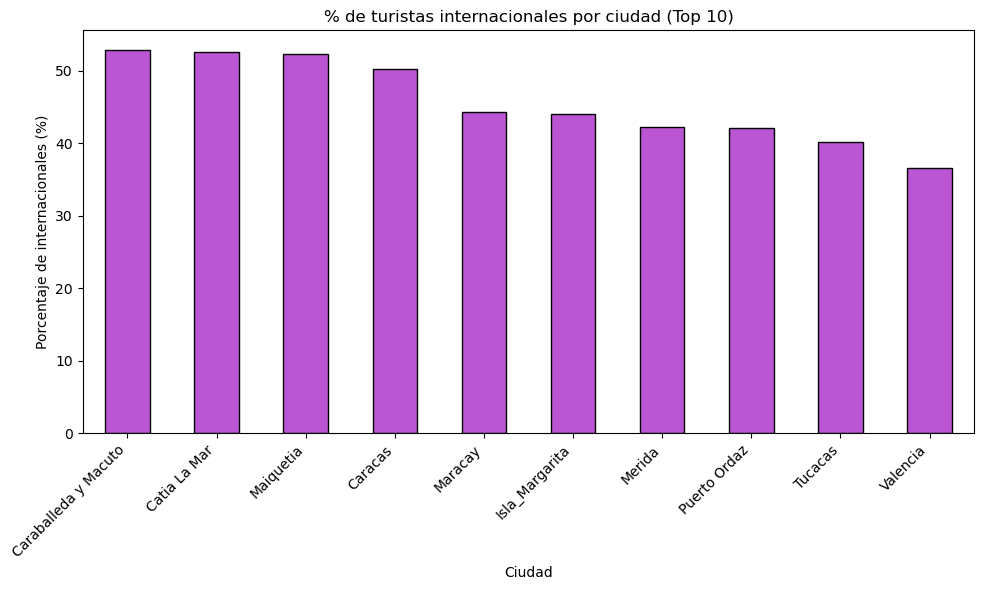

ciudad
Caraballeda y Macuto    52.916314
Catia La Mar            52.565181
Maiquetia               52.356579
Caracas                 50.204718
Maracay                 44.347826
Isla_Margarita          44.049459
Merida                  42.295082
Puerto Ordaz            42.038217
Tucacas                 40.099010
Valencia                36.631779
Name: user_country, dtype: float64

In [28]:
log_step("Calcular y visualizar el porcentaje de turistas internacionales por ciudad (Top 10)")
# calcular % de turistas internacionales por ciudad
perfil_ciudad = (
    df.groupby("ciudad")["user_country"]
      .apply(lambda x: (x != "Venezuela").mean()*100)
      .sort_values(ascending=False)
)

# gráfico de barras (top 10 ciudades más internacionales)
plt.figure(figsize=(10,6))
perfil_ciudad.head(10).plot(kind="bar", color="mediumorchid", edgecolor="black")
plt.title("% de turistas internacionales por ciudad (Top 10)")
plt.ylabel("Porcentaje de internacionales (%)")
plt.xlabel("Ciudad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

perfil_ciudad.head(10)

# Scatterplot competitivo

[STEP] Calcular métricas por ciudad (reseñas totales, % internacionales, rating promedio) y visualizar en scatterplot


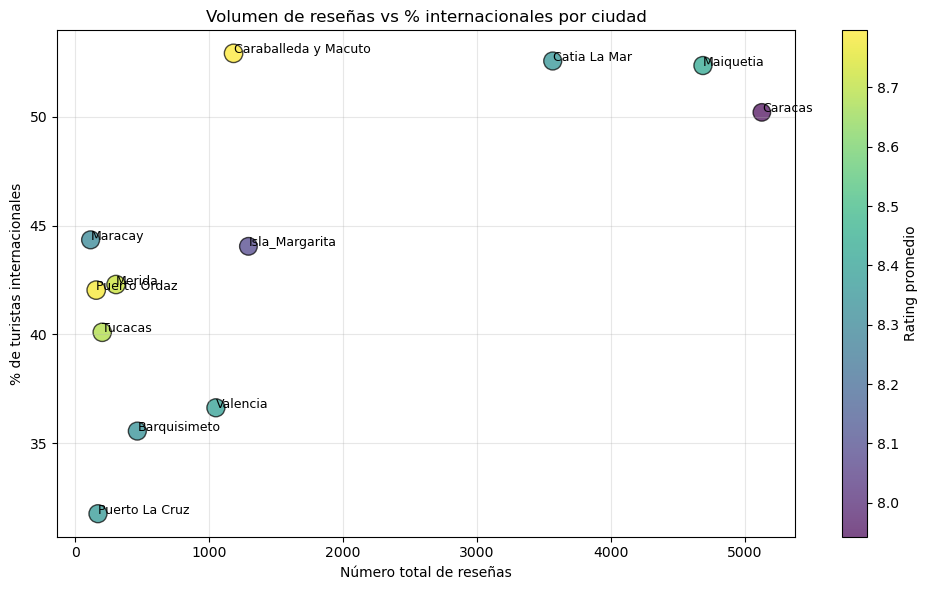

,ciudad,total_reviews,internacionales_pct,rating_promedio
2,Caracas,5129,50.204718,7.942874
5,Maiquetia,4689,52.356579,8.425464
3,Catia La Mar,3567,52.565181,8.353799
4,Isla_Margarita,1294,44.049459,8.085781
1,Caraballeda y Macuto,1183,52.916314,8.796281
11,Valencia,1051,36.631779,8.392959
0,Barquisimeto,464,35.560345,8.340517
7,Merida,305,42.295082,8.718033
10,Tucacas,202,40.099010,8.683168
8,Puerto La Cruz,170,31.764706,8.370588


In [29]:
log_step("Calcular métricas por ciudad (reseñas totales, % internacionales, rating promedio) y visualizar en scatterplot")

# calcular métricas por ciudad
ciudad_stats = df.groupby("ciudad").agg(
    total_reviews=("user_country","size"),
    internacionales_pct=("user_country", lambda x: (x!="Venezuela").mean()*100),
    rating_promedio=("rating","mean")
).reset_index()

# scatterplot
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    ciudad_stats["total_reviews"], 
    ciudad_stats["internacionales_pct"], 
    s=ciudad_stats["rating_promedio"]*20, # tamaño ~ rating
    c=ciudad_stats["rating_promedio"], cmap="viridis", alpha=0.7, edgecolor="black"
)

plt.colorbar(scatter, label="Rating promedio")
plt.title("Volumen de reseñas vs % internacionales por ciudad")
plt.xlabel("Número total de reseñas")
plt.ylabel("% de turistas internacionales")
plt.grid(alpha=0.3)

# etiquetas para las ciudades más relevantes
for _, row in ciudad_stats.sort_values("total_reviews", ascending=False).head(15).iterrows():
    plt.text(row["total_reviews"], row["internacionales_pct"], row["ciudad"], fontsize=9)

plt.tight_layout()
plt.show()

ciudad_stats.sort_values("total_reviews", ascending=False)

[STEP] Visualizar mapa turístico competitivo: % de turistas internacionales vs rating promedio, tamaño ~ nº de reseñas por ciudad


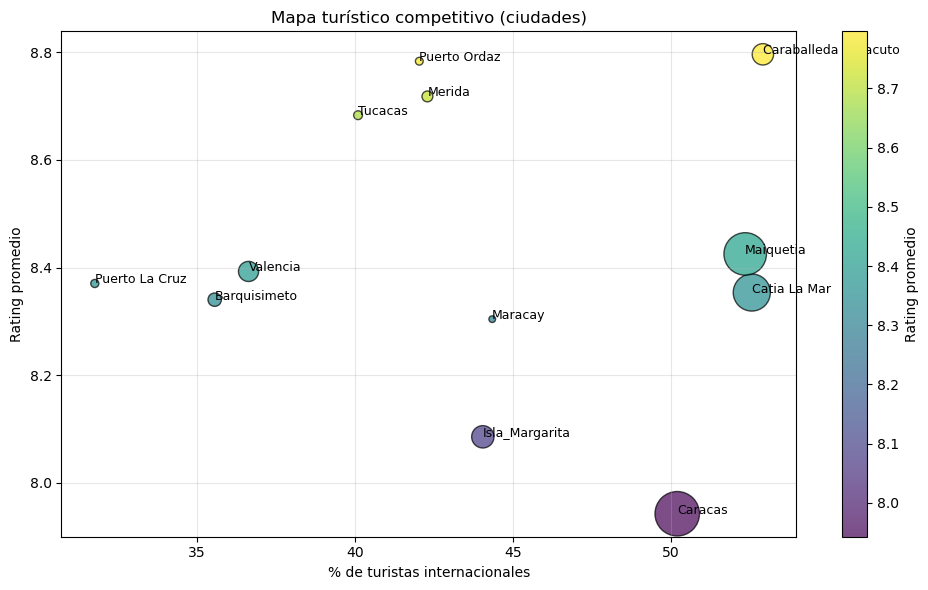

In [30]:
log_step("Visualizar mapa turístico competitivo: % de turistas internacionales vs rating promedio, tamaño ~ nº de reseñas por ciudad")

# scatterplot 
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    ciudad_stats["internacionales_pct"], 
    ciudad_stats["rating_promedio"], 
    s=ciudad_stats["total_reviews"]/5,  # tamaño proporcional al nº reseñas
    c=ciudad_stats["rating_promedio"], cmap="viridis", alpha=0.7, edgecolor="black"
)

plt.colorbar(scatter, label="Rating promedio")
plt.title("Mapa turístico competitivo (ciudades)")
plt.xlabel("% de turistas internacionales")
plt.ylabel("Rating promedio")
plt.grid(alpha=0.3)

# etiquetas para top ciudades
for _, row in ciudad_stats.sort_values("total_reviews", ascending=False).iterrows():
    plt.text(row["internacionales_pct"], row["rating_promedio"], row["ciudad"], fontsize=9)

plt.tight_layout()
plt.show()

# Índice GuacamaIA de Satisfacción Internacional (IGSI)

Definimos:

rating_norm = rating promedio de la ciudad (0–10) normalizado a 0–1.

sentiment_norm = sentimiento promedio de reseñas (–1 a 1 → escalamos a 0–1).

intl_norm = % internacionales (0–100 → escalamos a 0–1).

El IGSI será un promedio simple de esos 3 valores.

In [32]:
log_step("Calcular índice IGSI por ciudad combinando rating, sentimiento e internacionales; generar ranking Top 10")

from sklearn.preprocessing import MinMaxScaler
# calcular métricas incluyendo sentimiento
ciudad_stats_full = df.groupby("ciudad").agg(
    total_reviews=("user_country","size"),
    internacionales_pct=("user_country", lambda x: (x!="Venezuela").mean()*100),
    rating_promedio=("rating","mean"),
    sentiment_promedio=("sentiment","mean")
).reset_index()

# normalizar variables (rating 0–10, sentiment –1 a 1, % internacionales 0–100)
scaler = MinMaxScaler()

ciudad_stats_full[["rating_norm","sentiment_norm","intl_norm"]] = scaler.fit_transform(
    ciudad_stats_full[["rating_promedio","sentiment_promedio","internacionales_pct"]]
)

# calcular índice IGSI (promedio de las 3 variables normalizadas)
ciudad_stats_full["IGSI"] = ciudad_stats_full[["rating_norm","sentiment_norm","intl_norm"]].mean(axis=1)

# ranking de ciudades por IGSI
ranking_igsi = ciudad_stats_full.sort_values("IGSI", ascending=False).head(10)

# mostrar ranking
ranking_igsi[["ciudad","rating_promedio","sentiment_promedio","internacionales_pct","IGSI"]]

[STEP] Calcular índice IGSI por ciudad combinando rating, sentimiento e internacionales normalizados; generar ranking Top 10


,ciudad,rating_promedio,sentiment_promedio,internacionales_pct,IGSI
1,Caraballeda y Macuto,8.796281,0.479613,52.916314,0.950763
9,Puerto Ordaz,8.783439,0.495588,42.038217,0.823554
5,Maiquetia,8.425464,0.464352,52.356579,0.750068
3,Catia La Mar,8.353799,0.458765,52.565181,0.708141
7,Merida,8.718033,0.431168,42.295082,0.603501
10,Tucacas,8.683168,0.434559,40.099010,0.565724
0,Barquisimeto,8.340517,0.491071,35.560345,0.534546
2,Caracas,7.942874,0.453581,50.204718,0.494460
6,Maracay,8.304348,0.426742,44.347826,0.460627
8,Puerto La Cruz,8.370588,0.479805,31.764706,0.451749


[STEP] Visualizar en gráfico de barras el IGSI Top 10 ciudades


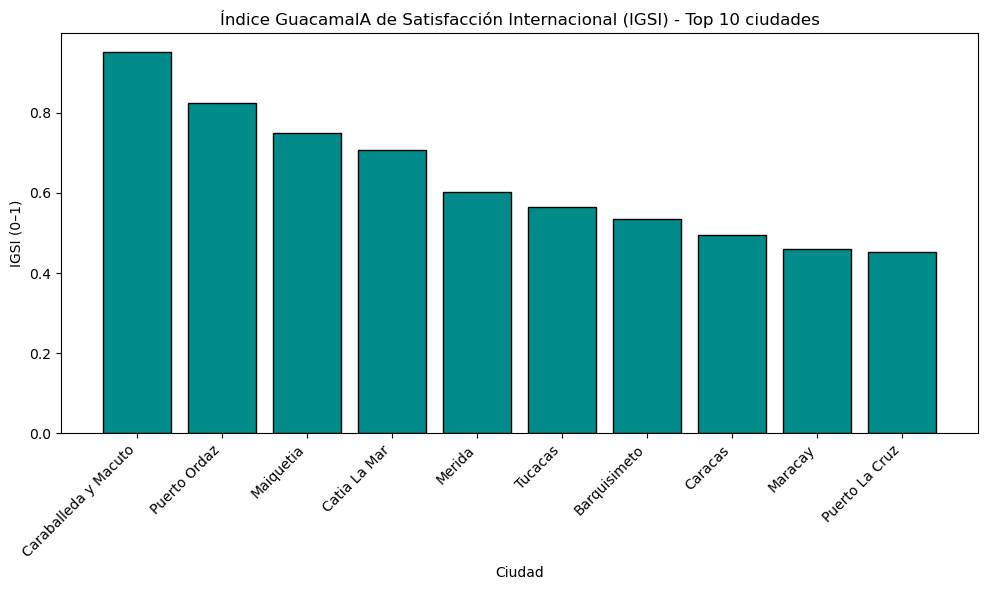

In [33]:
log_step("Visualizar en gráfico de barras el IGSI Top 10 ciudades")

# gráfico de barras con IGSI top 10
plt.figure(figsize=(10,6))
plt.bar(ranking_igsi["ciudad"], ranking_igsi["IGSI"], color="darkcyan", edgecolor="black")
plt.title("Índice GuacamaIA de Satisfacción Internacional (IGSI) - Top 10 ciudades")
plt.ylabel("IGSI (0–1)")
plt.xlabel("Ciudad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

El índice guacamaia de satisfacción internacional (igsi) es una métrica compuesta que busca medir, de forma integrada, el atractivo turístico de las principales ciudades de venezuela desde la perspectiva del viajero internacional. el objetivo es superar la limitación de indicadores aislados (ej. solo el rating numérico o solo el número de reseñas) y construir una medida más robusta, que combine tres dimensiones clave:
calidad percibida (rating promedio):
refleja la puntuación objetiva (0–10) que los usuarios dan a su experiencia.
satisfacción expresada en texto (sentimiento promedio):
mide la polaridad de las reseñas mediante análisis de sentimiento (–1 negativo, 0 neutro, +1 positivo). esto captura matices que el rating no siempre refleja, como críticas escritas en reseñas con puntuaciones altas o elogios en reseñas de puntuaciones medias.atracción internacional (% de turistas extranjeros):
calcula qué proporción de las reseñas en cada ciudad proviene de usuarios cuyo país no es venezuela. este factor mide la capacidad de la ciudad para atraer visitantes internacionales, un objetivo estratégico del proyecto guacamaia el igsi funciona como un termómetro turístico internacional, que combina el qué dicen los turistas (sentimiento), cómo lo valoran (rating) y de dónde vienen (atracción internacional). su valor agregado es transformar datos dispersos en un indicador estratégico claro y defendible para la toma de decisiones en turismo inteligente.